In [1]:
import pandas as pd

# Cargar el CSV
csv_path = "steam_games2 final.csv"
df = pd.read_csv(csv_path)

# Limpiar y convertir el precio
df["Precio"] = df["Precio"].str.replace("$", "").str.replace(",", "").astype(float)


In [2]:
# Separar géneros en múltiples filas
df_genres = df.dropna(subset=["Géneros"]).copy()
df_genres["Géneros"] = df_genres["Géneros"].str.split(", ")
df_genres = df_genres.explode("Géneros")

# Promedio de precios por género
avg_price_per_genre = df_genres.groupby("Géneros")["Precio"].mean().sort_values()

# 10 más baratos y 10 más caros
print("🎮 Géneros más baratos:")
print(avg_price_per_genre.head(10))
print("\n🎮 Géneros más caros:")
print(avg_price_per_genre.tail(10))


🎮 Géneros más baratos:
Géneros
Casual           6.200965
Indie            6.860997
Action           7.661051
Adventure        9.017752
Strategy         9.828793
Simulation      10.171913
Early Access    10.276291
Sports          10.586678
RPG             10.665506
Racing          10.692438
Name: Precio, dtype: float64

🎮 Géneros más caros:
Géneros
Game Development         17.313905
Education                17.466754
Design & Illustration    17.585771
Utilities                17.743077
Massively Multiplayer    18.073068
Audio Production         21.943559
Software Training        24.255625
Photo Editing            25.156667
Animation & Modeling     26.503694
Video Production         27.839677
Name: Precio, dtype: float64


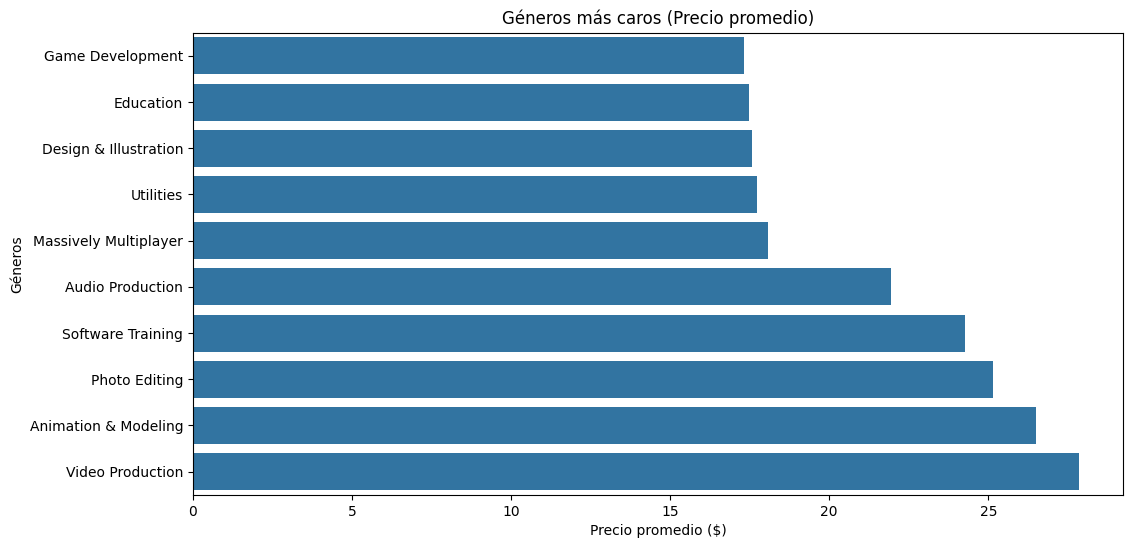

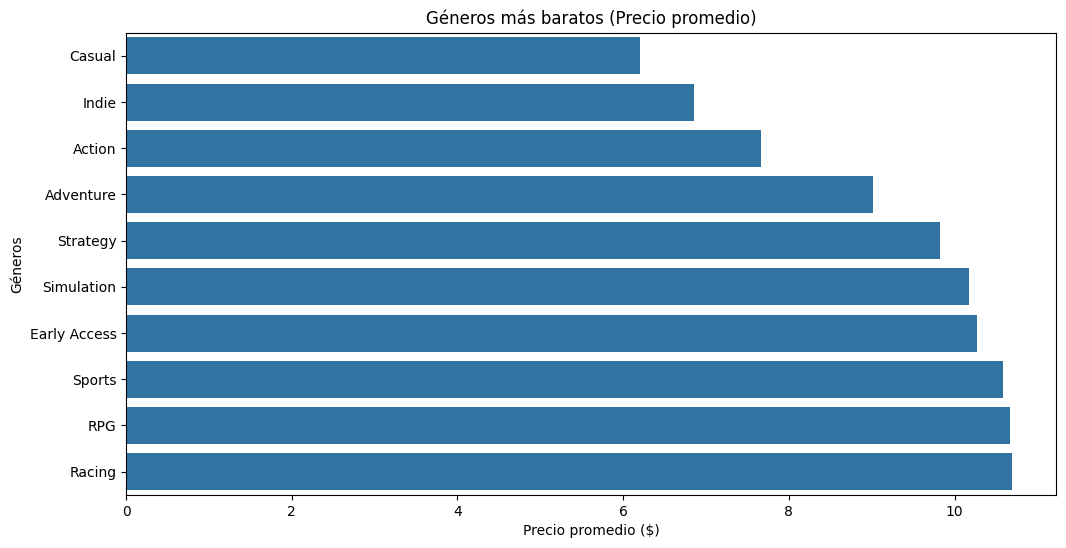

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_per_genre.tail(10).values, y=avg_price_per_genre.tail(10).index)
plt.title("Géneros más caros (Precio promedio)")
plt.xlabel("Precio promedio ($)")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_price_per_genre.head(10).values, y=avg_price_per_genre.head(10).index)
plt.title("Géneros más baratos (Precio promedio)")
plt.xlabel("Precio promedio ($)")
plt.show()


In [4]:

# Juegos con mejor puntuación de metacritic
df_sorted_reviews = df[df["Reseñas_Metacritic"] != "No disponible"].copy()
df_sorted_reviews["Reseñas_Metacritic"] = pd.to_numeric(df_sorted_reviews["Reseñas_Metacritic"])
top_reviews = df_sorted_reviews.sort_values("Reseñas_Metacritic", ascending=False).head(10)

print(top_reviews[["Nombre", "Reseñas_Metacritic"]])


                                            Nombre  Reseñas_Metacritic
10429                              Resident Evil 4                  91
10976                                        BZZZT                  91
4046                                    Hi-Fi RUSH                  90
9644                Like a Dragon: Infinite Wealth                  89
10100                      Return to Monkey Island                  87
3552       HITMAN 3 Access Pass: HITMAN 2 Standard                  87
3522                          HITMAN 3 - Chongqing                  87
3519   HITMAN 3 Access Pass: HITMAN 1 GOTY Upgrade                  87
3525                              HITMAN 3 - Dubai                  87
11592                                Astral Ascent                  87


In [5]:
import matplotlib.pyplot as plt
from collections import Counter
import re

def extract_cpus(texts):
    pattern = r"intel\s+i\d(?:-\d{4,5})?|ryzen\s?\d"
    cpus = []
    for text in texts.dropna():
        found = re.findall(pattern, text.lower())
        cpus.extend(f.strip() for f in found)
    return Counter(cpus)

def extract_gpus(texts):
    pattern = r"gtx\s?\d{3,4}|rtx\s?\d{3,4}|radeon\s?(?:rx)?\s?\w+"
    gpus = []
    for text in texts.dropna():
        found = re.findall(pattern, text.lower())
        gpus.extend(f.strip() for f in found)
    return Counter(gpus)


/var/folders/wy/qcvz_fs56vl8h_m3yxs7g6fc0000gn/T/ipykernel_29408/2523009955.py:15: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


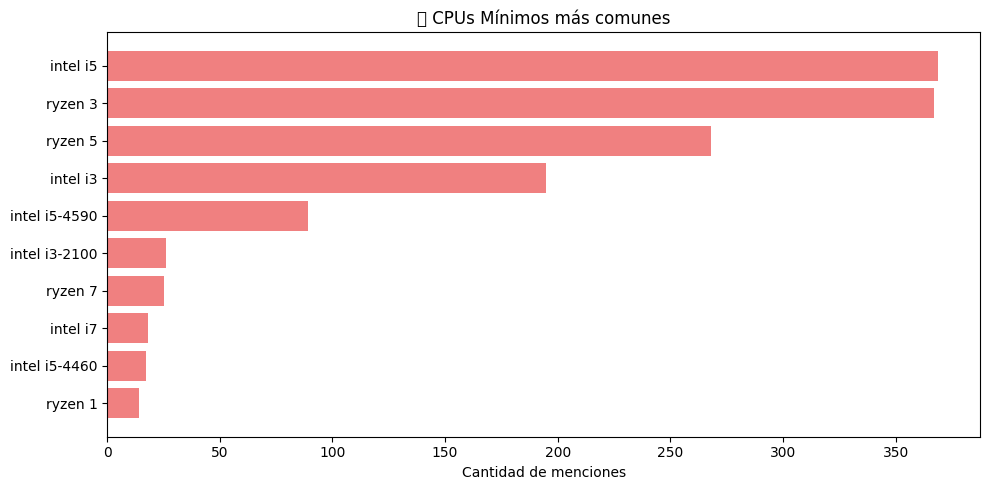

/var/folders/wy/qcvz_fs56vl8h_m3yxs7g6fc0000gn/T/ipykernel_29408/2523009955.py:15: UserWarning: Glyph 127918 (\N{VIDEO GAME}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127918 (\N{VIDEO GAME}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


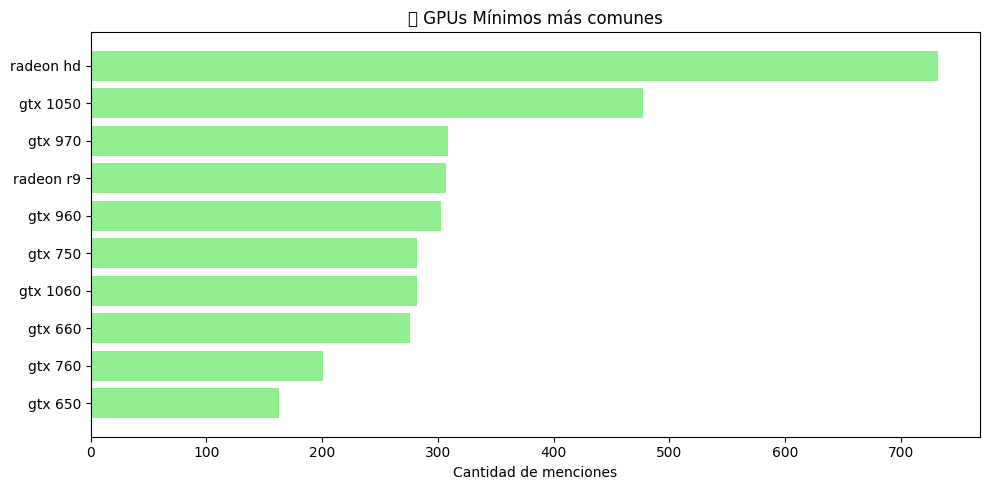

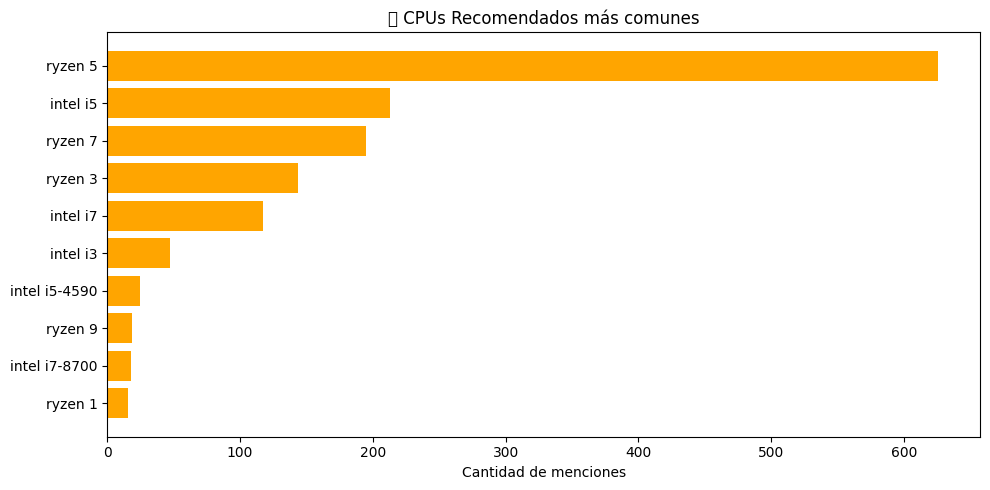

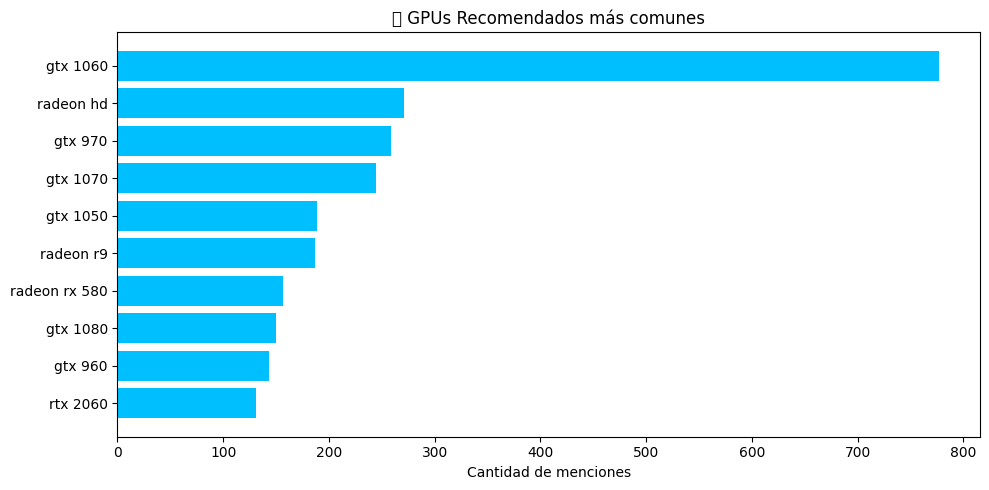

In [6]:
cpu_min = extract_cpus(df["Requisitos_Mínimos"])
gpu_min = extract_gpus(df["Requisitos_Mínimos"])
cpu_rec = extract_cpus(df["Requisitos_Recomendados"])
gpu_rec = extract_gpus(df["Requisitos_Recomendados"])

def plot_counter(counter: Counter, title: str, color="skyblue", top_n=10):
    most_common = counter.most_common(top_n)
    labels, values = zip(*most_common) if most_common else ([], [])
    
    plt.figure(figsize=(10, 5))
    plt.barh(labels, values, color=color)
    plt.xlabel("Cantidad de menciones")
    plt.title(title)
    plt.gca().invert_yaxis()  # para que el más popular quede arriba
    plt.tight_layout()
    plt.show()

plot_counter(cpu_min, "🧠 CPUs Mínimos más comunes", color="lightcoral")
plot_counter(gpu_min, "🎮 GPUs Mínimos más comunes", color="lightgreen")
plot_counter(cpu_rec, "🧠 CPUs Recomendados más comunes", color="orange")
plot_counter(gpu_rec, "🎮 GPUs Recomendados más comunes", color="deepskyblue")


In [7]:
# Juegos más baratos (descartando gratis)
cheapest = df[df["Precio"] > 0].sort_values("Precio").head(10)
most_expensive = df.sort_values("Precio", ascending=False).head(10)

print("🧊 Juegos más baratos:")
print(cheapest[["Nombre", "Precio"]])

print("\n🔥 Juegos más caros:")
print(most_expensive[["Nombre", "Precio"]])


🧊 Juegos más baratos:
                                         Nombre  Precio
13662                                    Aeonic    0.49
14460            The Red Hood: Hunting the Wolf    0.49
2224          Fantasy Jigsaw Puzzle 4 - ArtBook    0.49
4108   Adult Puzzles - Hentai Christmas ArtBook    0.49
13144                                  Mitigate    0.49
4149                                   BallRoll    0.49
11242                    Wizard Lady Soundtrack    0.49
2189                  Cooks Girls - Artbook 18+    0.49
2187                     Cooks Girls Soundtrack    0.49
11231                               Wizard Lady    0.49

🔥 Juegos más caros:
                                      Nombre  Precio
2722                 来自女巫森林的法师-开局+99999金币DLC  199.99
13092                               Diligent  199.99
357         Wild Terra 2 - Lord of Pain Pack  199.99
12091  Box Nation [] Lets Go Build and Fight  199.99
2219                          Hidden Flowers  199.99
3321                   

In [8]:
# Definimos un orden de mejor a peor para las reseñas de Steam
review_order = {
    "Overwhelmingly Positive": 6,
    "Very Positive": 5,
    "Positive": 4,
    "Mostly Positive": 3,
    "Mixed": 2,
    "Negative": 1,
    "Mostly Negative": 0,
    "Very Negative": -1
}

# Extraemos solo el texto de la reseña
df["Reseña_Texto"] = df["Reseñas_Steam"].str.extract(r"([A-Za-z\s]+)")

# Mapear a un número para poder ordenar
df["Reseña_Score"] = df["Reseña_Texto"].map(review_order)

# Ordenar por mejor puntuación
mejor_juego = df.sort_values(by="Reseña_Score", ascending=False).iloc[0]

print("🎮 Juego con mejor reseña de usuario:")
print(f"- Nombre: {mejor_juego['Nombre']}")
print(f"- Reseña: {mejor_juego['Reseñas_Steam']}")
print(f"- Precio: {mejor_juego['Precio']}")


🎮 Juego con mejor reseña de usuario:
- Nombre: The Sims™ 4 Greenhouse Haven Kit
- Reseña: Mostly Positive (14 reseñas)
- Precio: 4.99


In [9]:
from collections import Counter

# Separar géneros y contarlos
generos = df["Géneros"].dropna().str.split(", ")
todos_los_generos = [genero for lista in generos for genero in lista]
conteo_generos = Counter(todos_los_generos)


In [10]:
def plot_pie(counter: Counter, top_n=10, title="🎮 Distribución de juegos por género"):
    top = counter.most_common(top_n)
    labels, sizes = zip(*top)

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140)
    plt.title(title)
    plt.axis("equal")  # Hacer que el pastel sea un círculo
    plt.tight_layout()
    plt.show()


/var/folders/wy/qcvz_fs56vl8h_m3yxs7g6fc0000gn/T/ipykernel_29408/1310028444.py:9: UserWarning: Glyph 127918 (\N{VIDEO GAME}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127918 (\N{VIDEO GAME}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


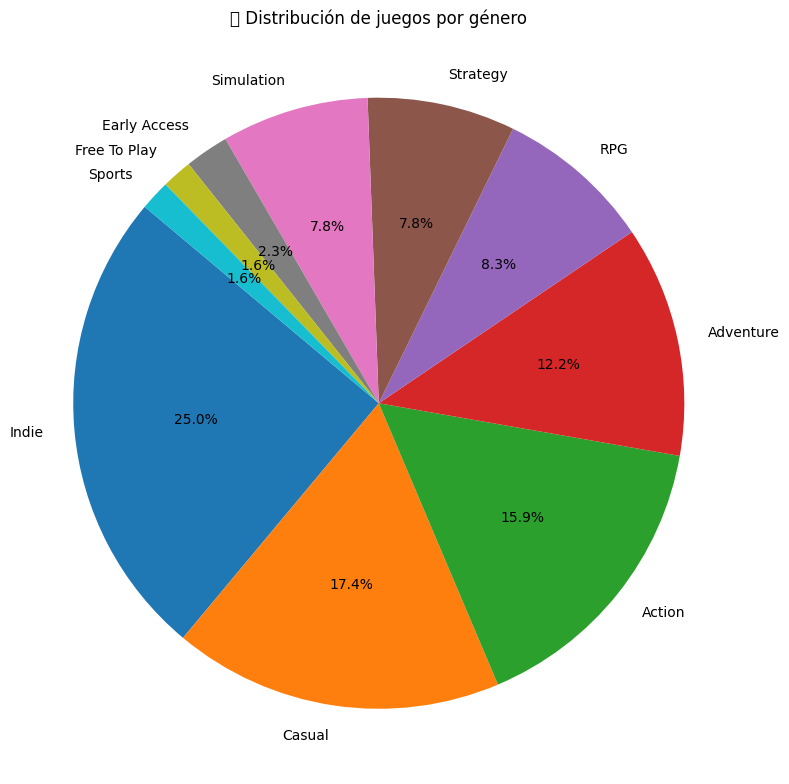

In [11]:
plot_pie(conteo_generos, top_n=10)


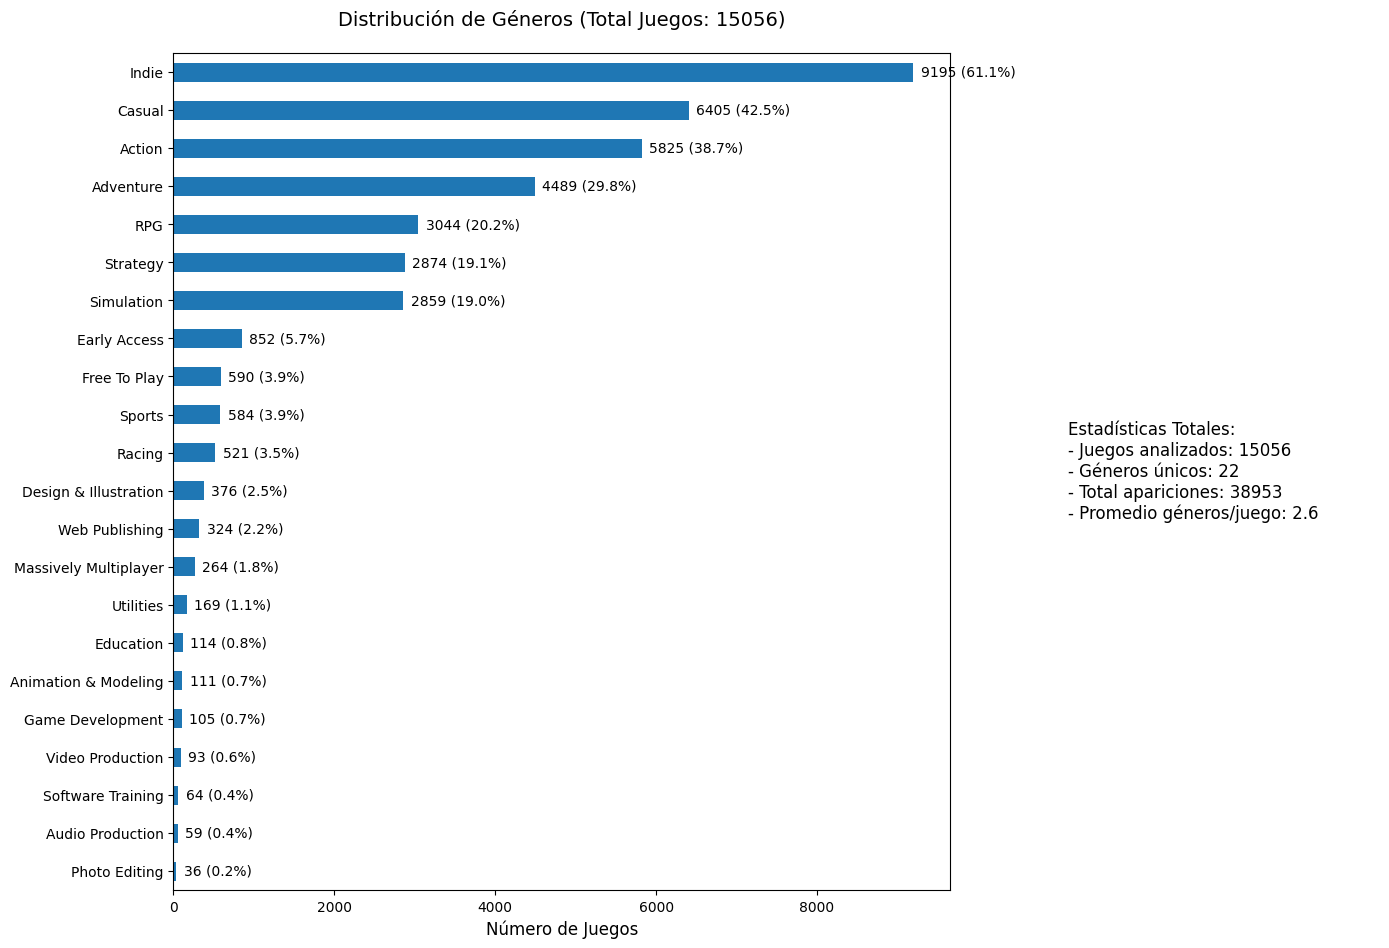

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import ast

# Cargar y limpiar los datos
csv_path = "steam_games2 final.csv"
df = pd.read_csv(csv_path)

# Limpiar precio (si es necesario)
if df["Precio"].dtype == object:
    df["Precio"] = df["Precio"].str.replace("$", "").str.replace(",", "").astype(float)

# Procesamiento de géneros
try:
    df["Géneros"] = df["Géneros"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])
except:
    df["Géneros"] = df["Géneros"].apply(lambda x: [g.strip() for g in x.split(",")] if pd.notna(x) else [])

# Calcular estadísticas clave
total_juegos = len(df)
total_generos = sum(len(g) for g in df["Géneros"])
generos_unicos = len(set(g for genres in df["Géneros"] for g in genres))

# Contar frecuencia de géneros
genre_counts = Counter(g for genres in df["Géneros"] for g in genres)
genre_df = pd.DataFrame.from_dict(genre_counts, orient='index', columns=['Count']).sort_values('Count', ascending=True)

# Crear figura con múltiples subplots
plt.figure(figsize=(14, 10))

# Gráfico principal de barras
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2, rowspan=3)
genre_df.plot(kind='barh', ax=ax1, color='#1f77b4', legend=False)
ax1.set_title(f'Distribución de Géneros (Total Juegos: {total_juegos})', fontsize=14, pad=20)
ax1.set_xlabel('Número de Juegos', fontsize=12)
ax1.set_ylabel('')

# Añadir etiquetas de valor con formato
for i, v in enumerate(genre_df['Count']):
    ax1.text(v + max(genre_df['Count'])*0.01, i, f'{v} ({v/total_juegos:.1%})', 
             color='black', fontsize=10, va='center')

# Cuadro de estadísticas
stats_text = f"""
Estadísticas Totales:
- Juegos analizados: {total_juegos}
- Géneros únicos: {generos_unicos}
- Total apariciones: {total_generos}
- Promedio géneros/juego: {total_generos/total_juegos:.1f}
"""
ax2 = plt.subplot2grid((3, 3), (0, 2), rowspan=3)
ax2.text(0.1, 0.5, stats_text, fontsize=12, va='center')
ax2.axis('off')

# Gráfico de proporción (inset)
#ax3 = plt.subplot2grid((3, 3), (2, 2), colspan=1)
#genre_df.tail(5).plot(kind='pie', y='Count', autopct='%1.1f%%', 
 #                    ax=ax3, legend=False, labels=None)
#ax3.set_ylabel('')
#ax3.set_title('Top 5 Géneros', fontsize=10)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

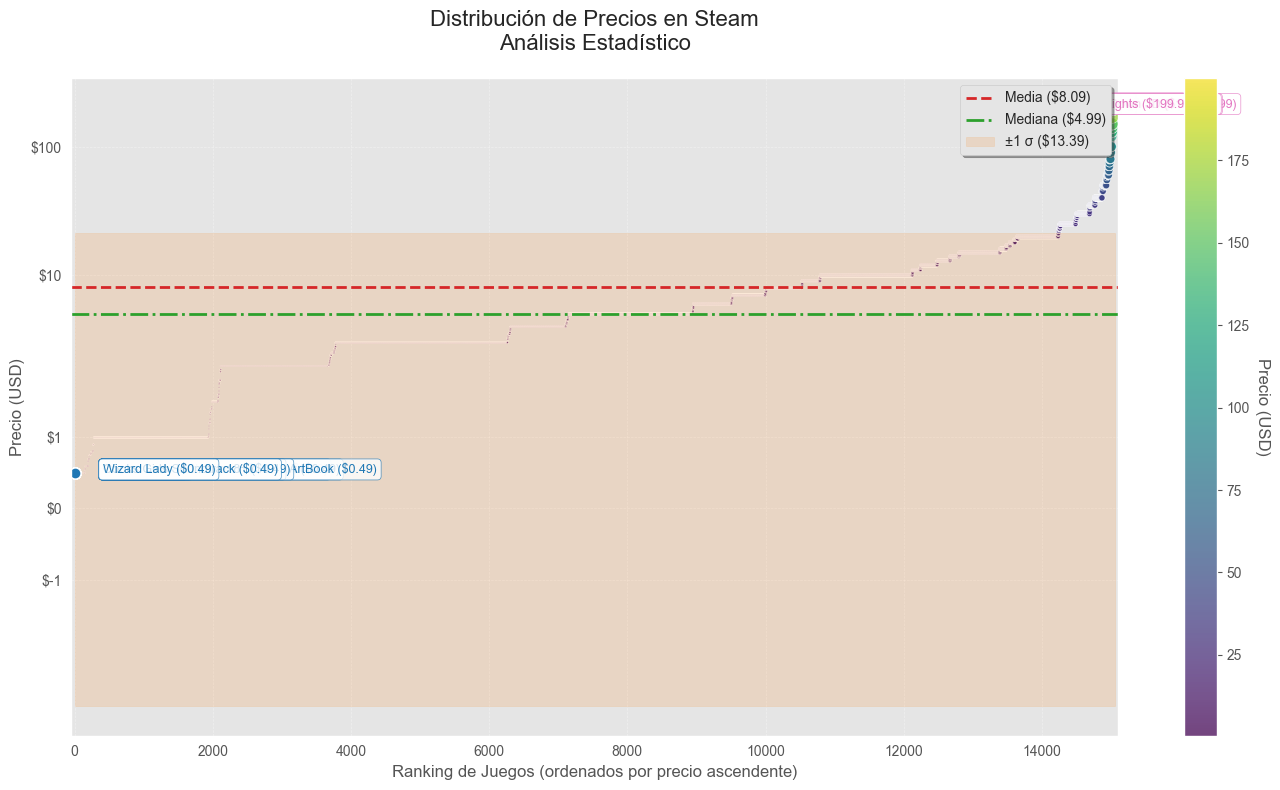

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter
from matplotlib import rcParams

# Configurar fuente compatible con CJK (usando una fuente común en sistemas macOS/Windows/Linux)
rcParams['font.family'] = 'Arial Unicode MS'  # Para macOS
# Alternativas si no funciona:
# rcParams['font.family'] = 'Microsoft JhengHei'  # Windows
# rcParams['font.family'] = 'Noto Sans CJK JP'    # Linux/Google Fonts

# Si las anteriores no están disponibles, usa una fuente genérica que soporte Unicode
rcParams['font.sans-serif'] = ['DejaVu Sans']  # Fuente alternativa que soporta más caracteres

# Configuración inicial
plt.figure(figsize=(14, 8))
plt.style.use('ggplot')

# Datos estadísticos (ejemplo - usa tus datos reales)
mean_price = df_paid["Precio"].mean()
median_price = df_paid["Precio"].median()
std_dev = df_paid["Precio"].std()

# Ordenar datos
sorted_prices = df_paid["Precio"].sort_values().reset_index(drop=True)

# --- GRÁFICO PRINCIPAL ---
# Dispersión con gradiente de color
scatter = plt.scatter(
    x=np.arange(len(sorted_prices)),
    y=sorted_prices,
    c=sorted_prices,
    cmap='viridis',
    s=np.where(sorted_prices > 0, sorted_prices/2, 5),  # Evitar tamaños cero
    alpha=0.7,
    edgecolors='white',
    linewidths=0.5
)

# --- LÍNEAS DE REFERENCIA ---
plt.axhline(mean_price, color='#d62728', linestyle='--', linewidth=2, 
            label=f'Media (${mean_price:.2f})')
plt.axhline(median_price, color='#2ca02c', linestyle='-.', linewidth=2, 
            label=f'Mediana (${median_price:.2f})')

# Banda de desviación estándar
plt.fill_between(
    [0, len(sorted_prices)],
    [mean_price - std_dev, mean_price - std_dev],
    [mean_price + std_dev, mean_price + std_dev],
    color='#ff7f0e',
    alpha=0.15,
    label=f'±1 σ (${std_dev:.2f})'
)

# --- DESTACAR VALORES EXTREMOS ---
def add_annotations(df_subset, color, x_offset):
    for idx, row in df_subset.iterrows():
        try:
            pos = sorted_prices[sorted_prices == row["Precio"]].index[0]
            plt.plot(pos, row["Precio"], 'o', markersize=8, color=color, 
                    markeredgewidth=1, markeredgecolor='white')
            
            # Texto alternativo si hay caracteres problemáticos
            game_name = row["Nombre"]
            if not all(ord(c) < 128 for c in game_name):  # Si contiene caracteres no ASCII
                game_name = game_name[:12] + '...'  # Acortar nombre
                
            plt.annotate(
                f'{game_name} (${row["Precio"]:.2f})',
                xy=(pos, row["Precio"]),
                xytext=(x_offset, 0),
                textcoords='offset points',
                color=color,
                fontsize=9,
                bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8, edgecolor=color)
            )
        except Exception as e:
            print(f"Error anotando {row['Nombre']}: {str(e)}")
            continue

add_annotations(cheapest, '#1f77b4', 20)
add_annotations(most_expensive, '#e377c2', -100)

# --- FORMATO PROFESIONAL ---
plt.yscale('symlog')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'${y:.0f}'))
plt.xlim(-50, len(sorted_prices)+50)

plt.title('Distribución de Precios en Steam\nAnálisis Estadístico', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Ranking de Juegos (ordenados por precio ascendente)', fontsize=12)
plt.ylabel('Precio (USD)', fontsize=12)

# Barra de color
cbar = plt.colorbar(scatter)
cbar.set_label('Precio (USD)', rotation=270, labelpad=15)

# Leyenda
plt.legend(loc='upper right', frameon=True, shadow=True)

# Grid y ajustes
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.4)

# Guardar con configuración especial para caracteres CJK
plt.savefig('precios_steam_matplotlib.png', 
           dpi=300, 
           bbox_inches='tight',
           facecolor='white',
           edgecolor='none',
           pil_kwargs={'quality': 95})

plt.tight_layout()
plt.show()

In [17]:
# Mostrar solo cada 50 juegos para evitar saturación
df_plot = df_paid.iloc[::50]

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Configuración inicial - ESTILO ACTUALIZADO
plt.style.use('seaborn-v0_8-darkgrid')  # Estilo alternativo compatible
plt.figure(figsize=(14, 8))

# Ver todos los estilos disponibles (por si quieres probar otros)
print("Estilos disponibles:", plt.style.available)

# Convertir fechas y extraer año (con manejo de errores mejorado)
df['Fecha_Lanzamiento'] = pd.to_datetime(df['Lanzamiento'], errors='coerce', format='mixed')
df['Año'] = df['Fecha_Lanzamiento'].dt.year

# Limpieza robusta de datos
df_clean = df.dropna(subset=['Año', 'Precio']).copy()
df_clean['Precio'] = pd.to_numeric(df_clean['Precio'], errors='coerce')
df_clean = df_clean[df_clean['Precio'] > 0]

# Agrupar por año con mínimo 5 juegos por año
stats = df_clean.groupby('Año')['Precio'].agg(['mean', 'median', 'std', 'count'])
stats = stats[stats['count'] >= 5]

# --- GRÁFICO PRINCIPAL ---
fig, ax = plt.subplots(figsize=(14, 8))

# Banda de desviación estándar
ax.fill_between(stats.index, 
                stats['mean'] - stats['std'], 
                stats['mean'] + stats['std'],
                color='skyblue', alpha=0.3, label='±1 Desviación Estándar')

# Líneas de tendencia
ax.plot(stats.index, stats['mean'], 
        color='#d62728', linestyle='-', linewidth=3, 
        marker='o', markersize=6, label='Promedio')

ax.plot(stats.index, stats['median'], 
        color='#2ca02c', linestyle='--', linewidth=2, 
        marker='s', markersize=5, label='Mediana')

# --- AJUSTES ESTÉTICOS ---
# Formatear ejes
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:.0f}'))

# Títulos y leyenda
ax.set_title('Evolución de Precios de Juegos por Año de Lanzamiento', fontsize=16, pad=20)
ax.set_xlabel('Año de Lanzamiento', fontsize=12)
ax.set_ylabel('Precio (USD)', fontsize=12)
ax.legend(loc='upper left', frameon=True)

# Añadir estadísticas globales
global_stats = (f"Estadísticas Globales:\n"
                f"• Juegos analizados: {len(df_clean)}\n"
                f"• Rango de años: {int(df_clean['Año'].min())}-{int(df_clean['Año'].max())}\n"
                f"• Precio promedio: ${df_clean['Precio'].mean():.2f}\n"
                f"• Desviación estándar: ${df_clean['Precio'].std():.2f}")

ax.annotate(global_stats, xy=(0.02, 0.75), xycoords='axes fraction',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Mostrar gráfico
plt.tight_layout()
plt.show()

Estilos disponibles: ['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


NameError: name 'df' is not defined

<Figure size 1400x800 with 0 Axes>

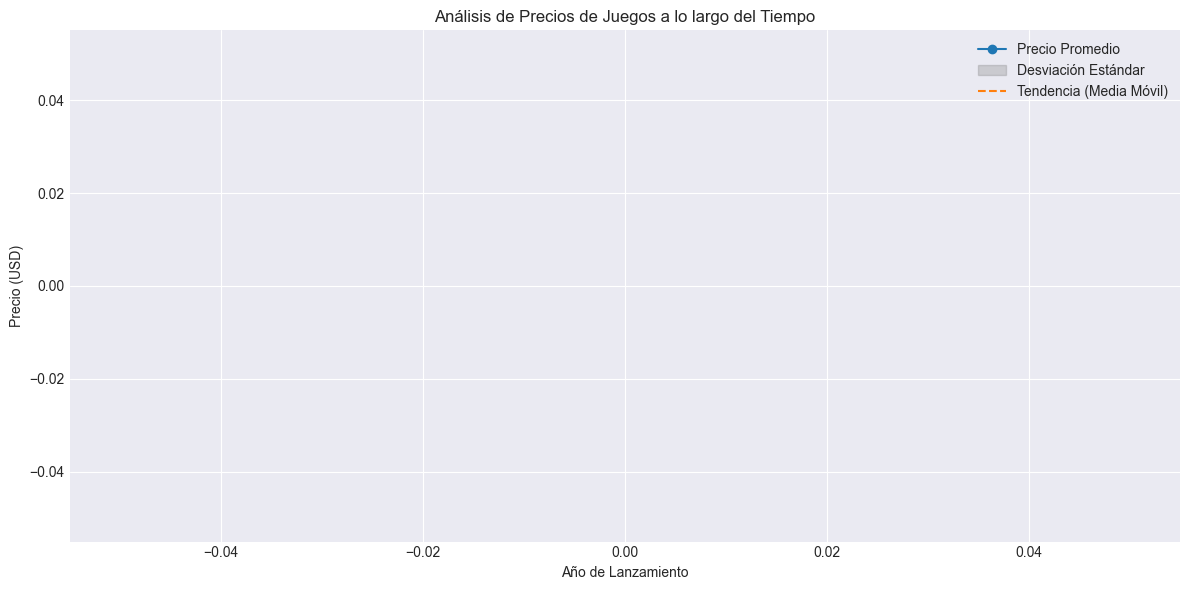

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el CSV
df = pd.read_csv('steam_games2 final.csv')

# Asegúrate de parsear las fechas y limpiar precios
df['Lanzamiento'] = pd.to_datetime(df['Lanzamiento'], errors='coerce')
df['Precio'] = pd.to_numerica(df['Precio'], errors='coerce')

# Eliminar filas con datos faltantes importantes
df = df.dropna(subset=['Lanzamiento', 'Precio'])

# Agrupar por año de lanzamiento
df['Año'] = df['Lanzamiento'].dt.year
precio_por_año = df.groupby('Año')['Precio'].agg(['mean', 'std'])

# Crear el gráfico
plt.figure(figsize=(12, 6))

# Promedio
plt.plot(precio_por_año.index, precio_por_año['mean'], label='Precio Promedio', marker='o')

# Desviación estándar
plt.fill_between(precio_por_año.index,
                 precio_por_año['mean'] - precio_por_año['std'],
                 precio_por_año['mean'] + precio_por_año['std'],
                 color='gray', alpha=0.3, label='Desviación Estándar')

# Tendencia con media móvil
precio_por_año['rolling'] = precio_por_año['mean'].rolling(window=3, center=True).mean()
plt.plot(precio_por_año.index, precio_por_año['rolling'], label='Tendencia (Media Móvil)', linestyle='--')

# Estética
plt.title('Análisis de Precios de Juegos a lo largo del Tiempo')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Precio (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


In [9]:
df = pd.read_csv('steam_games2 final.csv')
df_lanzamientos = df[['Lanzamiento']].copy()
print(df_lanzamientos.head(100))

     Lanzamiento
0   Apr 20, 2023
1   Apr 20, 2023
2   Sep 29, 2022
3   Nov 12, 2024
4    Jun 3, 2023
..           ...
95  May 23, 2024
96  Dec 15, 2022
97  Jan 29, 2023
98  Oct 19, 2022
99   Oct 2, 2022

[100 rows x 1 columns]


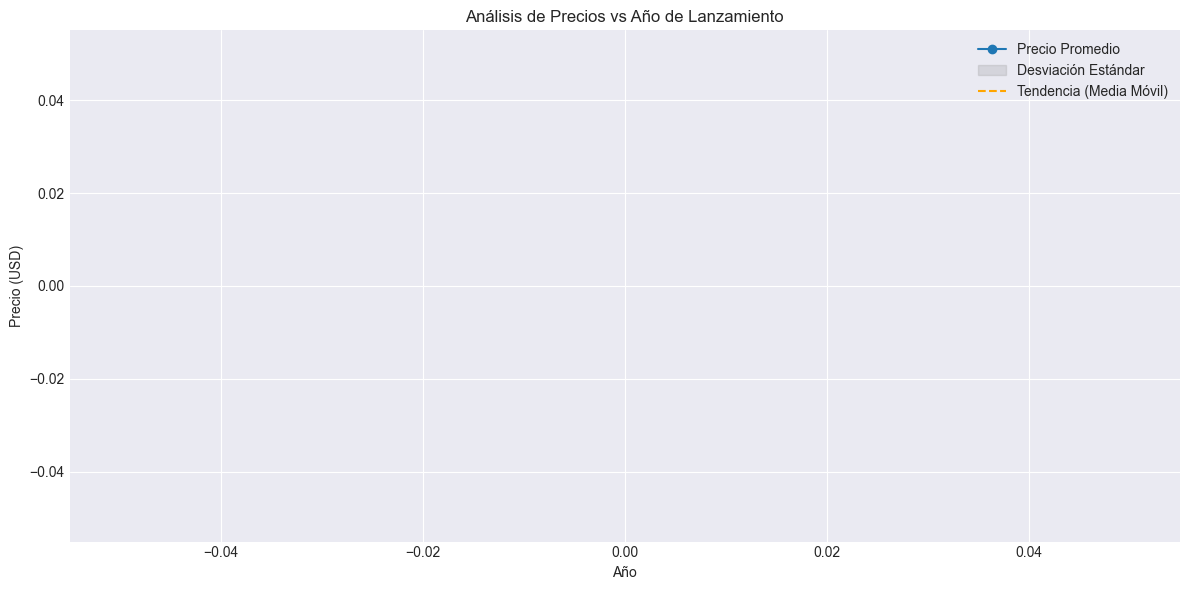

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar CSV
df = pd.read_csv("steam_games2 final.csv")

# Asegurar que las columnas están bien nombradas
df.rename(columns={
    'Lanzamiento': 'Fecha',
    'Precio': 'Precio'
}, inplace=True)

# Parsear fechas y precios
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')
df['Precio'] = pd.to_numeric(df['Precio'], errors='coerce')

# Filtrar filas válidas
df = df.dropna(subset=['Fecha', 'Precio'])

# Extraer año (o también podés usar mes si querés más granularidad)
df['Año'] = df['Fecha'].dt.year
# Agrupamos por año
precio_stats = df.groupby('Año')['Precio'].agg(['mean', 'std'])

# Media móvil como tendencia (puede cambiarse por regresión si querés algo más técnico)
precio_stats['rolling'] = precio_stats['mean'].rolling(window=3, center=True).mean()

plt.figure(figsize=(12, 6))

# Promedio
plt.plot(precio_stats.index, precio_stats['mean'], marker='o', label='Precio Promedio')

# Banda de desviación estándar
plt.fill_between(precio_stats.index,
                 precio_stats['mean'] - precio_stats['std'],
                 precio_stats['mean'] + precio_stats['std'],
                 alpha=0.2, label='Desviación Estándar', color='gray')

# Tendencia (media móvil)
plt.plot(precio_stats.index, precio_stats['rolling'], linestyle='--', color='orange', label='Tendencia (Media Móvil)')

# Estética
plt.title("Análisis de Precios vs Año de Lanzamiento")
plt.xlabel("Año")
plt.ylabel("Precio (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

# Cargar el CSV
df = pd.read_csv("steam_games2 final.csv")

# Convertir columnas relevantes
df['Precio'] = pd.to_numeric(df['Precio'], errors='coerce')
df['Metacritic'] = pd.to_numeric(df['Reseñas_Metacritic'], errors='coerce')

# Limpiar datos
df = df.dropna(subset=['Precio', 'Metacritic'])

# Agrupar por puntuación de Metacritic
grouped = df.groupby('Metacritic')['Precio'].agg(['mean', 'std']).dropna()

# Calcular regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(df['Metacritic'], df['Precio'])
x_vals = np.linspace(df['Metacritic'].min(), df['Metacritic'].max(), 100)
regression_line = slope * x_vals + intercept

# Graficar
plt.figure(figsize=(12, 6))

# Media
plt.plot(grouped.index, grouped['mean'], label='Precio Promedio', marker='o')

# Banda de desviación estándar
plt.fill_between(grouped.index,
                 grouped['mean'] - grouped['std'],
                 grouped['mean'] + grouped['std'],
                 color='gray', alpha=0.2, label='Desviación Estándar')

# Línea de tendencia (regresión)
plt.plot(x_vals, regression_line, '--', color='orange', label='Tendencia (Regresión Lineal)')

# Estética
plt.title("Relación entre Puntuación Metacritic y Precio de Juegos")
plt.xlabel("Puntuación Metacritic")
plt.ylabel("Precio (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


ValueError: Inputs must not be empty.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 6.8 MB/s eta 0:00:006.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# 1. Cargar y limpiar datos
df = pd.read_csv("steam_games2 final.csv")
print(f"Filas después de limpiar: {len(df_clean)}")
# Extraer numéricos de Metacritic y convertir precio
df['Metacritic'] = pd.to_numeric(df['Reseñas_Metacritic'].str.extract(r'(\d+)')[0], errors='coerce')
df['Precio'] = pd.to_numeric(df['Precio'], errors='coerce')

# Filtrar datos válidos y quitar outliers extremos (opcional)
df_clean = df.dropna(subset=['Metacritic', 'Precio'])
df_clean = df_clean[(df_clean['Precio'] > 0) & 
                   (df_clean['Precio'] < 200) &  # Ajustar según tus datos
                   (df_clean['Metacritic'].between(20, 100))]

# 2. Agrupar por puntuación (con mínimo 5 juegos por grupo)
grouped = df_clean.groupby('Metacritic')['Precio'].agg(['mean', 'std', 'count'])
grouped = grouped[grouped['count'] >= 5]

# 3. Regresión lineal con intervalo de confianza
x = df_clean['Metacritic']
y = df_clean['Precio']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
regression_line = intercept + slope * x_vals

# Calcular intervalo de confianza 95%
confidence = 0.95
n = len(x)
t = stats.t.ppf((1 + confidence) / 2, n - 2)
ci = t * std_err * np.sqrt(1/n + (x_vals - x.mean())**2 / np.sum((x - x.mean())**2))

# 4. Visualización mejorada
plt.figure(figsize=(14, 8), facecolor='white')

# Gráfico de dispersión con transparencia
plt.scatter(x, y, alpha=0.15, color='blue', label='Juegos individuales')

# Líneas estadísticas
plt.plot(x_vals, regression_line, '--', color='#FF6B6B', linewidth=3, 
         label=f'Tendencia (R²={r_value**2:.2f})')

# Intervalo de confianza
plt.fill_between(x_vals, regression_line - ci, regression_line + ci, 
                 color='#FF9E7D', alpha=0.3, label='IC 95%')

# Promedios por puntuación
plt.errorbar(grouped.index, grouped['mean'], yerr=grouped['std'],
             fmt='o-', color='#5E81AC', linewidth=2, markersize=8,
             label='Promedio ± 1σ', ecolor='#81A1C1', elinewidth=2, capsize=5)

# Ajustes estéticos
plt.title('Relación entre Calificación Metacritic y Precio de Juegos', 
          fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Puntuación Metacritic', fontsize=12)
plt.ylabel('Precio (USD)', fontsize=12)
plt.legend(loc='upper right', frameon=True, shadow=True)
plt.grid(True, linestyle='--', alpha=0.3)

# Anotaciones adicionales
plt.annotate(f'Correlación: {r_value:.2f}\nValor p: {p_value:.4f}',
             xy=(0.75, 0.85), xycoords='axes fraction',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Ajustar límites y mostrar
plt.xlim(40, 100)  # Ajustar según tus datos
plt.ylim(0, df_clean['Precio'].quantile(0.95))  # Excluir outliers extremos
plt.tight_layout()

# Guardar en alta calidad
plt.savefig('metacritic_vs_precio.png', dpi=300, bbox_inches='tight')
plt.show()

Filas después de limpiar: 0


ValueError: Inputs must not be empty.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# 1. Cargar y limpiar datos
df = pd.read_csv("steam_games2 final.csv")

# Convertir 'Precio' a numérico y 'Fecha_Lanzamiento' a datetime
df['Precio'] = pd.to_numeric(df['Precio'], errors='coerce')
df['Fecha_Lanzamiento'] = pd.to_datetime(df['Fecha_Lanzamiento'], errors='coerce')

# Eliminar filas sin precio o sin fecha válida
df_clean = df.dropna(subset=['Precio', 'Fecha_Lanzamiento'])

# Filtrar precios razonables (ejemplo: entre 0 y 200 USD)
df_clean = df_clean[(df_clean['Precio'] >= 0) & (df_clean['Precio'] <= 200)]

# Extraer el año de lanzamiento
df_clean['Año'] = df_clean['Fecha_Lanzamiento'].dt.year

# 2. Calcular estadísticas por año (promedio, desviación estándar, conteo)
stats_por_año = df_clean.groupby('Año')['Precio'].agg(['mean', 'std', 'count'])
stats_por_año = stats_por_año[stats_por_año['count'] >= 5]  # Solo años con al menos 5 juegos

# 3. Regresión lineal para la tendencia
x = stats_por_año.index
y = stats_por_año['mean']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
tendencia_lineal = intercept + slope * x

# 4. Gráfico mejorado
plt.figure(figsize=(12, 6), facecolor='white')

# Barras de error (desviación estándar)
plt.errorbar(
    x, y, 
    yerr=stats_por_año['std'], 
    fmt='o-', 
    color='#5E81AC', 
    linewidth=2, 
    markersize=8,
    label='Promedio ± 1σ',
    ecolor='#81A1C1', 
    capsize=5
)

# Tendencia lineal
plt.plot(
    x, tendencia_lineal, 
    '--', 
    color='#FF6B6B', 
    linewidth=3, 
    label=f'Tendencia (R²={r_value**2:.2f})'
)

# Ajustes estéticos
plt.title('Evolución del Precio Promedio de Juegos por Año', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Precio Promedio (USD)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)

# Anotación con correlación
plt.annotate(
    f'Correlación: {r_value:.2f}\nValor p: {p_value:.4f}',
    xy=(0.75, 0.85), 
    xycoords='axes fraction',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

# Ajustar límites para evitar años sin datos
plt.xlim(x.min() - 1, x.max() + 1)
plt.ylim(0, stats_por_año['mean'].max() * 1.2)  # Margen adicional en el eje Y

plt.tight_layout()
plt.savefig('precio_promedio_por_año.png', dpi=300, bbox_inches='tight')
plt.show()

KeyError: 'Fecha_Lanzamiento'

In [25]:
import requests
import pandas as pd
import time
import json

# Cargar el CSV
df = pd.read_csv("steam_games2 final.csv")

# API base y token
API_URL = "https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/"
ACCESS_TOKEN = "eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw"

# Lista para resultados exitosos
resultados = []

# Contadores
index = 0
éxitos = 0
máximo = 10

# Loop hasta lograr 10 éxitos o llegar al final del dataset
while éxitos < máximo and index < len(df):
    appid = df.loc[index, 'ID']
    print(f"Intentando appid {appid} ({éxitos+1}/{máximo})...")

    params = {
        "access_token": ACCESS_TOKEN,
        "appid": appid,
        "currency": "USD",
        "language": "en"
    }

    try:
        response = requests.get(API_URL, params=params)
        response.raise_for_status()

        data = response.json()
        resultados.append({
            "appid": appid,
            "resultado": data
        })
        éxitos += 1
        print("✅ OK")
    except Exception as e:
        print(f"❌ Error con appid {appid}: {e}")

    time.sleep(1)
    index += 1

# Guardar en JSON
with open("resultados_api.json", "w") as f:
    json.dump(resultados, f, indent=2)

print("Listo. Resultados guardados en resultados_api.json")


Intentando appid 2167330 (1/10)...
❌ Error con appid 2167330: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2167330&currency=USD&language=en
Intentando appid 2167331 (1/10)...
❌ Error con appid 2167331: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2167455 (1/10)...
❌ Error con appid 2167455: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2167455&currency=USD&language=en
Intentando appid 2167456 (1/10)...
❌ Error con appid 2167456: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2167467 (1/10)...
❌ Error con appid 2167467: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2167467&currency=USD&language=en
Intentando appid 2167490 (1/10)...
❌ Error con appid 2167490: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2166990 (1/10)...
❌ Error con appid 2166990: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2166990&currency=USD&language=en
Intentando appid 2167000 (1/10)...
❌ Error con appid 2167000: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2167230 (1/10)...
❌ Error con appid 2167230: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2167230&currency=USD&language=en
Intentando appid 2167250 (1/10)...
❌ Error con appid 2167250: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2166590 (1/10)...
❌ Error con appid 2166590: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2166590&currency=USD&language=en
Intentando appid 2166630 (1/10)...
❌ Error con appid 2166630: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2165900 (1/10)...
❌ Error con appid 2165900: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2165900&currency=USD&language=en
Intentando appid 2165920 (1/10)...
❌ Error con appid 2165920: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2166070 (1/10)...
❌ Error con appid 2166070: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2166070&currency=USD&language=en
Intentando appid 2166110 (1/10)...
❌ Error con appid 2166110: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2165380 (1/10)...
❌ Error con appid 2165380: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2165380&currency=USD&language=en
Intentando appid 2165390 (1/10)...
❌ Error con appid 2165390: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2165550 (1/10)...
❌ Error con appid 2165550: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2165550&currency=USD&language=en
Intentando appid 2165590 (1/10)...
❌ Error con appid 2165590: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2165790 (1/10)...
❌ Error con appid 2165790: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2165790&currency=USD&language=en
Intentando appid 2165800 (1/10)...
❌ Error con appid 2165800: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2165030 (1/10)...
❌ Error con appid 2165030: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2165030&currency=USD&language=en
Intentando appid 2165160 (1/10)...
❌ Error con appid 2165160: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2164610 (1/10)...
❌ Error con appid 2164610: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2164610&currency=USD&language=en
Intentando appid 2164630 (1/10)...
❌ Error con appid 2164630: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2164040 (1/10)...
❌ Error con appid 2164040: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2164040&currency=USD&language=en
Intentando appid 2164060 (1/10)...
❌ Error con appid 2164060: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2163590 (1/10)...
❌ Error con appid 2163590: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2163590&currency=USD&language=en
Intentando appid 2163600 (1/10)...
❌ Error con appid 2163600: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2163930 (1/10)...
❌ Error con appid 2163930: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2163930&currency=USD&language=en
Intentando appid 2163010 (1/10)...
❌ Error con appid 2163010: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2163460 (1/10)...
❌ Error con appid 2163460: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2163460&currency=USD&language=en
Intentando appid 2162550 (1/10)...
❌ Error con appid 2162550: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2162950 (1/10)...
❌ Error con appid 2162950: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2162950&currency=USD&language=en
Intentando appid 2162970 (1/10)...
❌ Error con appid 2162970: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2162260 (1/10)...
❌ Error con appid 2162260: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2162260&currency=USD&language=en
Intentando appid 2162350 (1/10)...
❌ Error con appid 2162350: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2161660 (1/10)...
❌ Error con appid 2161660: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2161660&currency=USD&language=en
Intentando appid 2161690 (1/10)...
❌ Error con appid 2161690: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2161120 (1/10)...
❌ Error con appid 2161120: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2161120&currency=USD&language=en
Intentando appid 2161130 (1/10)...
❌ Error con appid 2161130: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2161390 (1/10)...
❌ Error con appid 2161390: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2161390&currency=USD&language=en
Intentando appid 2161410 (1/10)...
❌ Error con appid 2161410: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2160710 (1/10)...
❌ Error con appid 2160710: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2160710&currency=USD&language=en
Intentando appid 2160720 (1/10)...
❌ Error con appid 2160720: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2160230 (1/10)...
❌ Error con appid 2160230: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2160230&currency=USD&language=en
Intentando appid 2160240 (1/10)...
❌ Error con appid 2160240: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2159580 (3/10)...
❌ Error con appid 2159580: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2159580&currency=USD&language=en
Intentando appid 2159650 (3/10)...
❌ Error con appid 2159650: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2159940 (3/10)...
❌ Error con appid 2159940: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2159940&currency=USD&language=en
Intentando appid 2159960 (3/10)...
❌ Error con appid 2159960: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2159320 (3/10)...
❌ Error con appid 2159320: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2159320&currency=USD&language=en
Intentando appid 2159350 (3/10)...
❌ Error con appid 2159350: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2159530 (3/10)...
❌ Error con appid 2159530: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2159530&currency=USD&language=en
Intentando appid 2158590 (3/10)...
❌ Error con appid 2158590: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2159000 (3/10)...
❌ Error con appid 2159000: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2159000&currency=USD&language=en
Intentando appid 2159020 (3/10)...
❌ Error con appid 2159020: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2158190 (3/10)...
❌ Error con appid 2158190: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2158190&currency=USD&language=en
Intentando appid 2158210 (3/10)...
❌ Error con appid 2158210: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2157600 (3/10)...
❌ Error con appid 2157600: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2157600&currency=USD&language=en
Intentando appid 2157650 (3/10)...
❌ Error con appid 2157650: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2158010 (3/10)...
❌ Error con appid 2158010: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2158010&currency=USD&language=en
Intentando appid 2158011 (3/10)...
❌ Error con appid 2158011: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2157290 (3/10)...
❌ Error con appid 2157290: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2157290&currency=USD&language=en
Intentando appid 2157340 (3/10)...
❌ Error con appid 2157340: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2156670 (3/10)...
❌ Error con appid 2156670: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2156670&currency=USD&language=en
Intentando appid 2156680 (3/10)...
❌ Error con appid 2156680: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2156970 (3/10)...
❌ Error con appid 2156970: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2156970&currency=USD&language=en
Intentando appid 2157000 (3/10)...
❌ Error con appid 2157000: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2156239 (3/10)...
❌ Error con appid 2156239: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2156239&currency=USD&language=en
Intentando appid 2156250 (3/10)...
❌ Error con appid 2156250: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2156540 (3/10)...
❌ Error con appid 2156540: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2156540&currency=USD&language=en
Intentando appid 2156590 (3/10)...
❌ Error con appid 2156590: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2156030 (3/10)...
❌ Error con appid 2156030: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2156030&currency=USD&language=en
Intentando appid 2156040 (3/10)...
❌ Error con appid 2156040: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2155560 (3/10)...
❌ Error con appid 2155560: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2155560&currency=USD&language=en
Intentando appid 2155570 (3/10)...
❌ Error con appid 2155570: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2154950 (3/10)...
❌ Error con appid 2154950: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2154950&currency=USD&language=en
Intentando appid 2154960 (3/10)...
❌ Error con appid 2154960: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2155260 (3/10)...
❌ Error con appid 2155260: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2155260&currency=USD&language=en
Intentando appid 2155280 (3/10)...
❌ Error con appid 2155280: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2154650 (4/10)...
❌ Error con appid 2154650: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2154650&currency=USD&language=en
Intentando appid 2154660 (4/10)...
❌ Error con appid 2154660: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2154010 (4/10)...
❌ Error con appid 2154010: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2154010&currency=USD&language=en
Intentando appid 2154020 (4/10)...
❌ Error con appid 2154020: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2154173 (4/10)...
❌ Error con appid 2154173: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2154173&currency=USD&language=en
Intentando appid 2154174 (4/10)...
❌ Error con appid 2154174: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2153590 (5/10)...
❌ Error con appid 2153590: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2153590&currency=USD&language=en
Intentando appid 2153600 (5/10)...
❌ Error con appid 2153600: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2153810 (5/10)...
❌ Error con appid 2153810: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2153810&currency=USD&language=en
Intentando appid 2153840 (5/10)...
❌ Error con appid 2153840: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2153050 (5/10)...
❌ Error con appid 2153050: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2153050&currency=USD&language=en
Intentando appid 2153120 (5/10)...
❌ Error con appid 2153120: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2153343 (5/10)...
❌ Error con appid 2153343: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2153343&currency=USD&language=en
Intentando appid 2153350 (5/10)...
❌ Error con appid 2153350: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2152690 (5/10)...
❌ Error con appid 2152690: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2152690&currency=USD&language=en
Intentando appid 2152710 (5/10)...
❌ Error con appid 2152710: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2152940 (5/10)...
❌ Error con appid 2152940: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2152940&currency=USD&language=en
Intentando appid 2152030 (5/10)...
❌ Error con appid 2152030: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2152200 (5/10)...
❌ Error con appid 2152200: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2152200&currency=USD&language=en
Intentando appid 2152210 (5/10)...
❌ Error con appid 2152210: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2152440 (5/10)...
❌ Error con appid 2152440: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2152440&currency=USD&language=en
Intentando appid 2152480 (5/10)...
❌ Error con appid 2152480: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2151860 (5/10)...
❌ Error con appid 2151860: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2151860&currency=USD&language=en
Intentando appid 2151870 (5/10)...
❌ Error con appid 2151870: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2151210 (6/10)...
❌ Error con appid 2151210: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2151210&currency=USD&language=en
Intentando appid 2151220 (6/10)...
❌ Error con appid 2151220: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2151343 (6/10)...
❌ Error con appid 2151343: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2151343&currency=USD&language=en
Intentando appid 2151350 (6/10)...
❌ Error con appid 2151350: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2150670 (6/10)...
❌ Error con appid 2150670: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2150670&currency=USD&language=en
Intentando appid 2150690 (6/10)...
❌ Error con appid 2150690: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2150910 (6/10)...
❌ Error con appid 2150910: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2150910&currency=USD&language=en
Intentando appid 2150950 (6/10)...
✅ OK
Intentando appid 2151000 (7/10)...
❌ Error con appid 2151000: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGc

Intentando appid 2150410 (7/10)...
❌ Error con appid 2150410: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2150410&currency=USD&language=en
Intentando appid 2150430 (7/10)...
❌ Error con appid 2150430: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2150632 (7/10)...
❌ Error con appid 2150632: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2150632&currency=USD&language=en
Intentando appid 2150633 (7/10)...
❌ Error con appid 2150633: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2149940 (7/10)...
❌ Error con appid 2149940: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2149940&currency=USD&language=en
Intentando appid 2149960 (7/10)...
❌ Error con appid 2149960: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2150170 (7/10)...
❌ Error con appid 2150170: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2150170&currency=USD&language=en
Intentando appid 2150180 (7/10)...
❌ Error con appid 2150180: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2149430 (7/10)...
❌ Error con appid 2149430: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2149430&currency=USD&language=en
Intentando appid 2149460 (7/10)...
❌ Error con appid 2149460: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2149660 (7/10)...
❌ Error con appid 2149660: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2149660&currency=USD&language=en
Intentando appid 2149680 (7/10)...
❌ Error con appid 2149680: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2148902 (7/10)...
❌ Error con appid 2148902: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2148902&currency=USD&language=en
Intentando appid 2148904 (7/10)...
❌ Error con appid 2148904: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2148423 (7/10)...
❌ Error con appid 2148423: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2148423&currency=USD&language=en
Intentando appid 2148424 (7/10)...
❌ Error con appid 2148424: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2148530 (7/10)...
❌ Error con appid 2148530: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2148530&currency=USD&language=en
Intentando appid 2148580 (7/10)...
❌ Error con appid 2148580: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2148060 (7/10)...
❌ Error con appid 2148060: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2148060&currency=USD&language=en
Intentando appid 2148080 (7/10)...
❌ Error con appid 2148080: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2148240 (7/10)...
❌ Error con appid 2148240: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2148240&currency=USD&language=en
Intentando appid 2148250 (7/10)...
❌ Error con appid 2148250: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2147632 (7/10)...
❌ Error con appid 2147632: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2147632&currency=USD&language=en
Intentando appid 2147633 (7/10)...
❌ Error con appid 2147633: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2147010 (7/10)...
❌ Error con appid 2147010: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2147010&currency=USD&language=en
Intentando appid 2147020 (7/10)...
❌ Error con appid 2147020: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2147380 (7/10)...
❌ Error con appid 2147380: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2147380&currency=USD&language=en
Intentando appid 2147410 (7/10)...
❌ Error con appid 2147410: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2146720 (7/10)...
❌ Error con appid 2146720: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2146720&currency=USD&language=en
Intentando appid 2146730 (7/10)...
❌ Error con appid 2146730: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2146100 (7/10)...
❌ Error con appid 2146100: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2146100&currency=USD&language=en
Intentando appid 2146110 (7/10)...
❌ Error con appid 2146110: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2146300 (7/10)...
❌ Error con appid 2146300: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2146300&currency=USD&language=en
Intentando appid 2146320 (7/10)...
❌ Error con appid 2146320: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2145780 (7/10)...
❌ Error con appid 2145780: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2145780&currency=USD&language=en
Intentando appid 2145810 (7/10)...
❌ Error con appid 2145810: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2145120 (7/10)...
❌ Error con appid 2145120: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2145120&currency=USD&language=en
Intentando appid 2145140 (7/10)...
❌ Error con appid 2145140: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2145490 (7/10)...
❌ Error con appid 2145490: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2145490&currency=USD&language=en
Intentando appid 2145520 (7/10)...
❌ Error con appid 2145520: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2144910 (7/10)...
❌ Error con appid 2144910: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2144910&currency=USD&language=en
Intentando appid 2145000 (7/10)...
❌ Error con appid 2145000: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2144360 (7/10)...
❌ Error con appid 2144360: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2144360&currency=USD&language=en
Intentando appid 2144400 (7/10)...
❌ Error con appid 2144400: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2144483 (7/10)...
❌ Error con appid 2144483: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2144483&currency=USD&language=en
Intentando appid 2144510 (7/10)...
❌ Error con appid 2144510: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2143840 (7/10)...
❌ Error con appid 2143840: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2143840&currency=USD&language=en
Intentando appid 2143860 (7/10)...
❌ Error con appid 2143860: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2144120 (7/10)...
❌ Error con appid 2144120: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2144120&currency=USD&language=en
Intentando appid 2143160 (7/10)...
❌ Error con appid 2143160: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2143510 (7/10)...
❌ Error con appid 2143510: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2143510&currency=USD&language=en
Intentando appid 2143530 (7/10)...
❌ Error con appid 2143530: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2142820 (7/10)...
❌ Error con appid 2142820: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2142820&currency=USD&language=en
Intentando appid 2142830 (7/10)...
❌ Error con appid 2142830: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2142220 (7/10)...
❌ Error con appid 2142220: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2142220&currency=USD&language=en
Intentando appid 2142230 (7/10)...
❌ Error con appid 2142230: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2142510 (7/10)...
❌ Error con appid 2142510: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2142510&currency=USD&language=en
Intentando appid 2142610 (7/10)...
❌ Error con appid 2142610: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2141970 (7/10)...
❌ Error con appid 2141970: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2141970&currency=USD&language=en
Intentando appid 2141971 (7/10)...
❌ Error con appid 2141971: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2141981 (7/10)...
❌ Error con appid 2141981: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2141981&currency=USD&language=en
Intentando appid 2141982 (7/10)...
❌ Error con appid 2141982: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2142110 (7/10)...
❌ Error con appid 2142110: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2142110&currency=USD&language=en
Intentando appid 2142140 (7/10)...
❌ Error con appid 2142140: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2141640 (7/10)...
❌ Error con appid 2141640: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2141640&currency=USD&language=en
Intentando appid 2141650 (7/10)...
❌ Error con appid 2141650: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2141010 (7/10)...
❌ Error con appid 2141010: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2141010&currency=USD&language=en
Intentando appid 2141040 (7/10)...
❌ Error con appid 2141040: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2140410 (7/10)...
❌ Error con appid 2140410: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2140410&currency=USD&language=en
Intentando appid 2140420 (7/10)...
❌ Error con appid 2140420: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2140680 (7/10)...
❌ Error con appid 2140680: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2140680&currency=USD&language=en
Intentando appid 2140730 (7/10)...
❌ Error con appid 2140730: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2140050 (7/10)...
❌ Error con appid 2140050: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2140050&currency=USD&language=en
Intentando appid 2140080 (7/10)...
❌ Error con appid 2140080: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

Intentando appid 2139510 (7/10)...
❌ Error con appid 2139510: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18yNjIwNkJBQl85N0E2MiIsICJzdWIiOiAiNzY1NjExOTgzOTg3NjI0NzAiLCAiYXVkIjogWyAid2ViOmNvbW11bml0eSIgXSwgImV4cCI6IDE3NDQ3MzQxMzAsICJuYmYiOiAxNzM2MDA2Mjc1LCAiaWF0IjogMTc0NDY0NjI3NSwgImp0aSI6ICIwMDEyXzI2MjA2RDA0XzlERDQ1IiwgIm9hdCI6IDE3NDQ2NDYyNzQsICJydF9leHAiOiAxNzYyODc4MTQ0LCAicGVyIjogMCwgImlwX3N1YmplY3QiOiAiMTg2LjE1Ni4xMzUuMjI1IiwgImlwX2NvbmZpcm1lciI6ICI0NS4yMzIuOTMuOCIgfQ.FQQbL6VED9_PjIpuBs7-YJ8TOGkdd1CarX3SoKs8DZkMj6gDwWcfyysNNqd9mC0JpdVg54wH-UrYhiPwwdqoDw&appid=2139510&currency=USD&language=en
Intentando appid 2139530 (7/10)...
❌ Error con appid 2139530: 500 Server Error: Internal Server Error for url: https://api.steampowered.com/ISteamEconomy/GetAssetPrices/v1/?access_token=eyAidHlwIjogIkpXVCIsICJhbGciOiAiRWREU0EiIH0.eyAiaXNzIjogInI6MDAwM18

KeyboardInterrupt: 

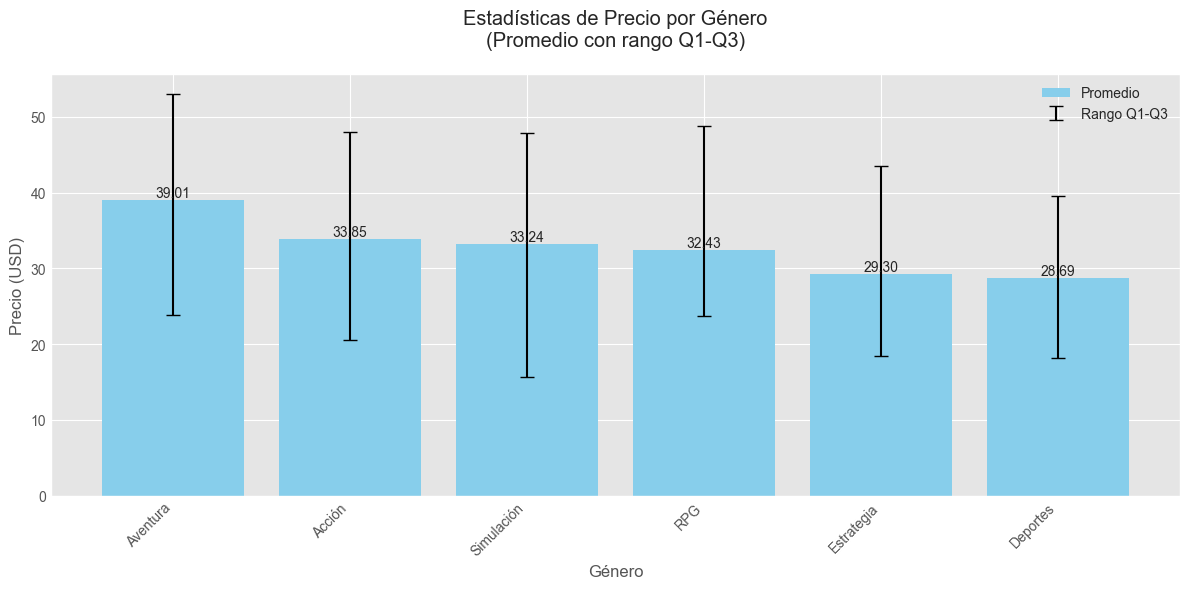

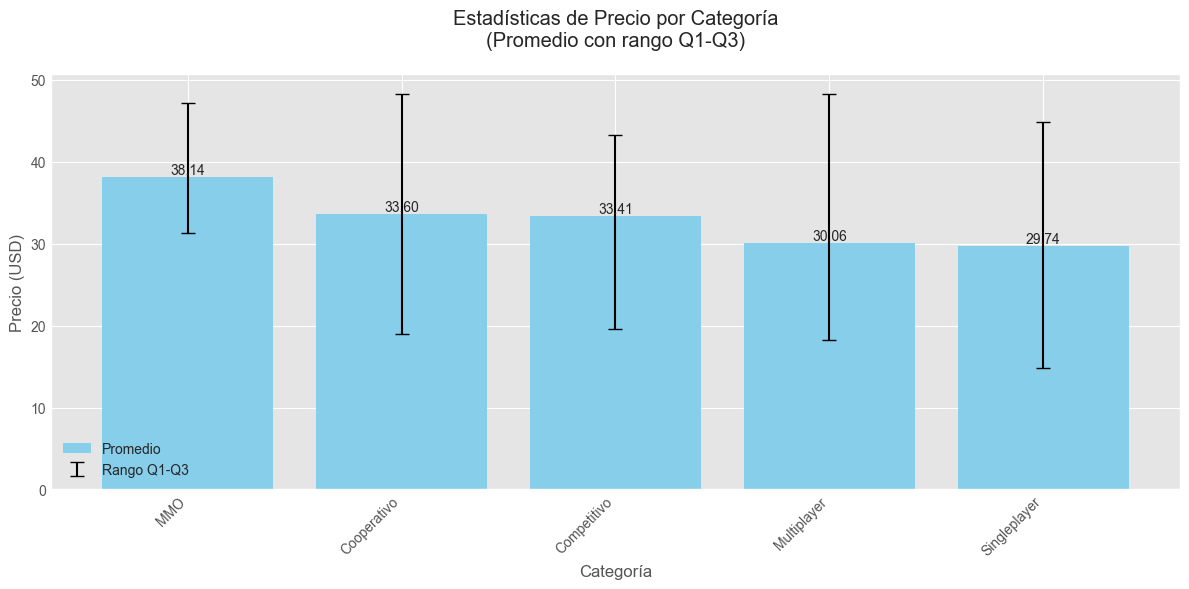

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración inicial
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

# Supongamos que tus datos están en un CSV
# df = pd.read_csv('tus_datos.csv')

# Como no tengo los datos reales, crearé un dataframe de ejemplo
data = {
    'ID': range(1, 101),
    'Precio': np.random.uniform(5, 60, 100),
    'Géneros': np.random.choice(['Acción', 'Aventura', 'RPG', 'Estrategia', 'Deportes', 'Simulación'], 100),
    'Categorías': np.random.choice(['Singleplayer', 'Multiplayer', 'Cooperativo', 'Competitivo', 'MMO'], 100)
}
df = pd.DataFrame(data)

# Función para procesar y graficar
def plot_price_stats_by_column(column, title):
    # Calcular estadísticas
    stats = df.groupby(column)['Precio'].agg(['mean', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])
    stats.columns = ['Promedio', 'Q1', 'Q3']
    stats = stats.sort_values('Promedio', ascending=False)
    
    # Crear gráfico
    plt.figure(figsize=(12, 6))
    
    # Barras para el promedio
    bars = plt.bar(stats.index, stats['Promedio'], color='skyblue', label='Promedio')
    
    # Líneas para Q1 y Q3
    plt.errorbar(stats.index, stats['Promedio'], 
                 yerr=[stats['Promedio'] - stats['Q1'], stats['Q3'] - stats['Promedio']],
                 fmt='none', ecolor='black', capsize=5, label='Rango Q1-Q3')
    
    # Añadir etiquetas
    plt.title(f'Estadísticas de Precio por {title}\n(Promedio con rango Q1-Q3)', pad=20)
    plt.xlabel(title)
    plt.ylabel('Precio (USD)')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    
    # Añadir valores encima de las barras
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.2f}',
                 ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Gráfico para Géneros
plot_price_stats_by_column('Géneros', 'Género')

# Gráfico para Categorías
plot_price_stats_by_column('Categorías', 'Categoría')

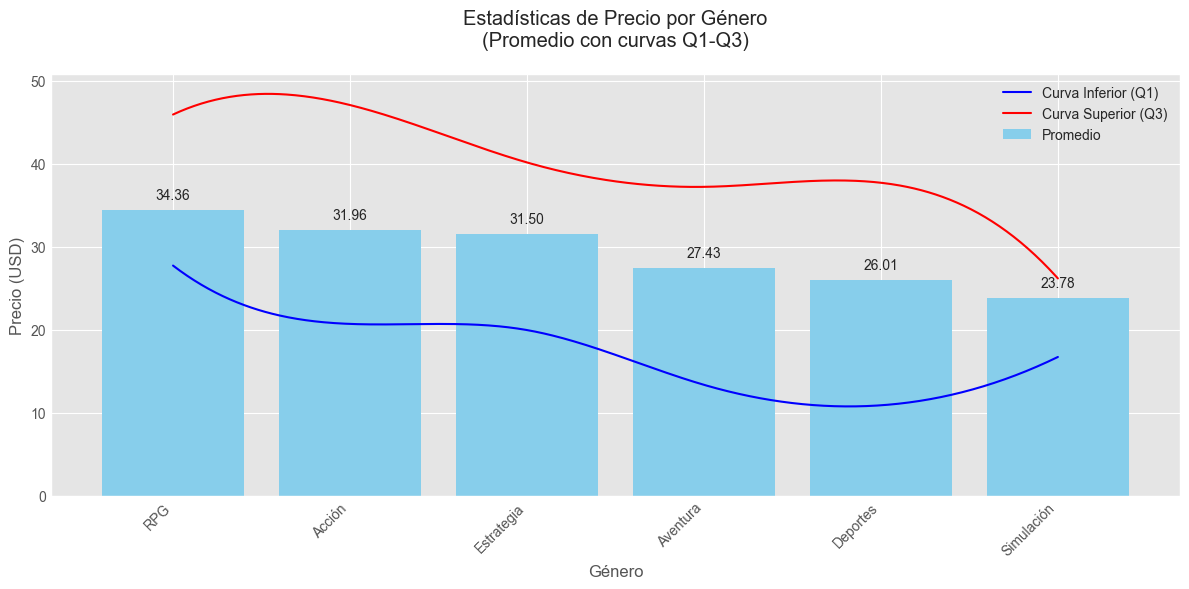

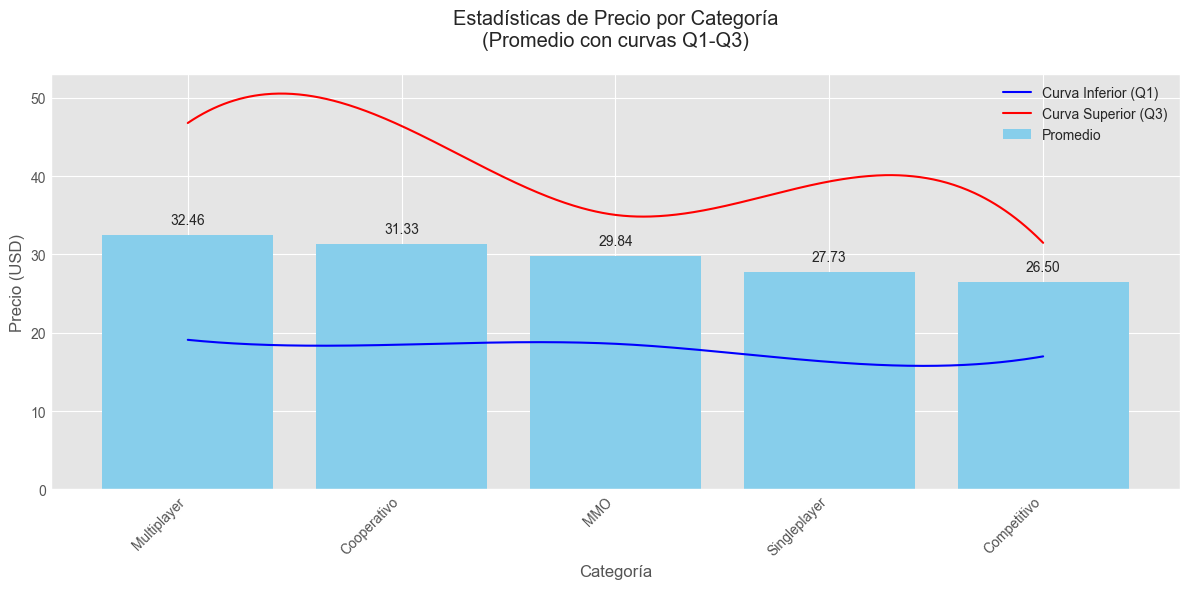

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.interpolate import make_interp_spline

# Configuración inicial
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

# Ejemplo de datos
data = {
    'ID': range(1, 101),
    'Precio': np.random.uniform(5, 60, 100),
    'Géneros': np.random.choice(['Acción', 'Aventura', 'RPG', 'Estrategia', 'Deportes', 'Simulación'], 100),
    'Categorías': np.random.choice(['Singleplayer', 'Multiplayer', 'Cooperativo', 'Competitivo', 'MMO'], 100)
}
df = pd.DataFrame(data)

# Función para graficar con curvas
def plot_price_stats_by_column(column, title):
    stats = df.groupby(column)['Precio'].agg(['mean', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])
    stats.columns = ['Promedio', 'Q1', 'Q3']
    stats = stats.sort_values('Promedio', ascending=False)

    plt.figure(figsize=(12, 6))

    x_pos = np.arange(len(stats))

    # Barras para el promedio
    bars = plt.bar(x_pos, stats['Promedio'], color='skyblue', label='Promedio')

    # Curvas para Q1 y Q3
    # Generar spline para la curva inferior (Q1) y superior (Q3)
    for q, color, label in zip([stats['Q1'], stats['Q3']], ['blue', 'red'], ['Curva Inferior (Q1)', 'Curva Superior (Q3)']):
        # Interpolación para crear una curva suave
        spline = make_interp_spline(x_pos, q, k=3)  # k=3 para una curva suave (cúbica)
        x_new = np.linspace(min(x_pos), max(x_pos), 500)
        y_new = spline(x_new)

        # Plot de la curva
        plt.plot(x_new, y_new, color=color, linestyle='-', label=label)

    # Estética
    plt.title(f'Estadísticas de Precio por {title}\n(Promedio con curvas Q1-Q3)', pad=20)
    plt.xlabel(title)
    plt.ylabel('Precio (USD)')
    plt.xticks(x_pos, stats.index, rotation=45, ha='right')
    plt.legend()

    # Mostrar valores encima de las barras
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + 1,
                 f'{height:.2f}',
                 ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Ejecutar con Géneros y Categorías
plot_price_stats_by_column('Géneros', 'Género')
plot_price_stats_by_column('Categorías', 'Categoría')


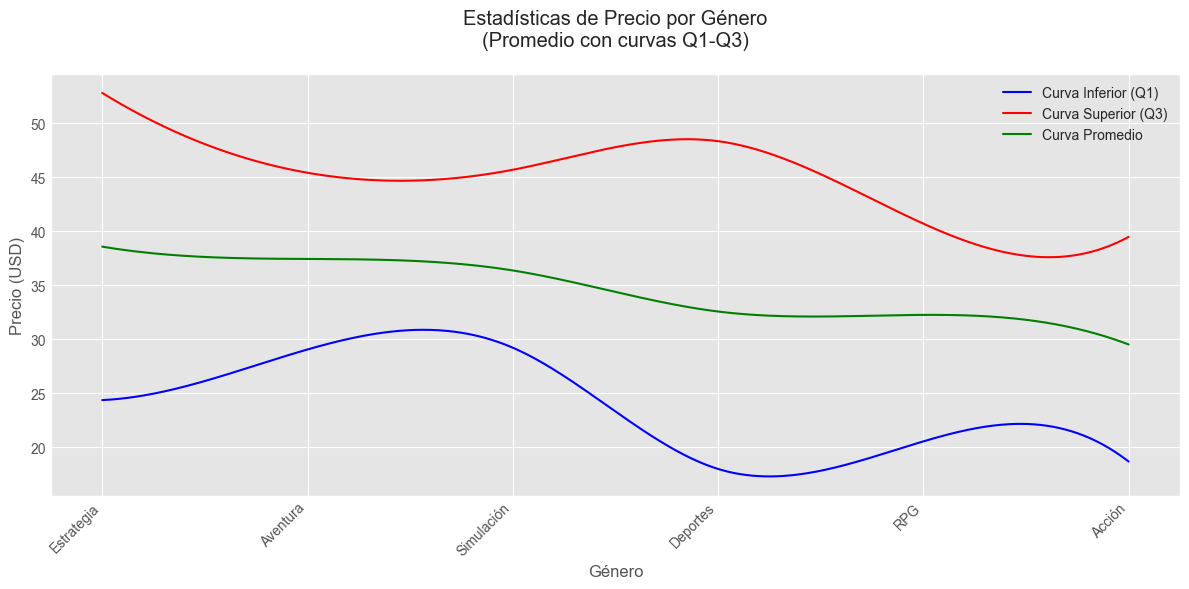

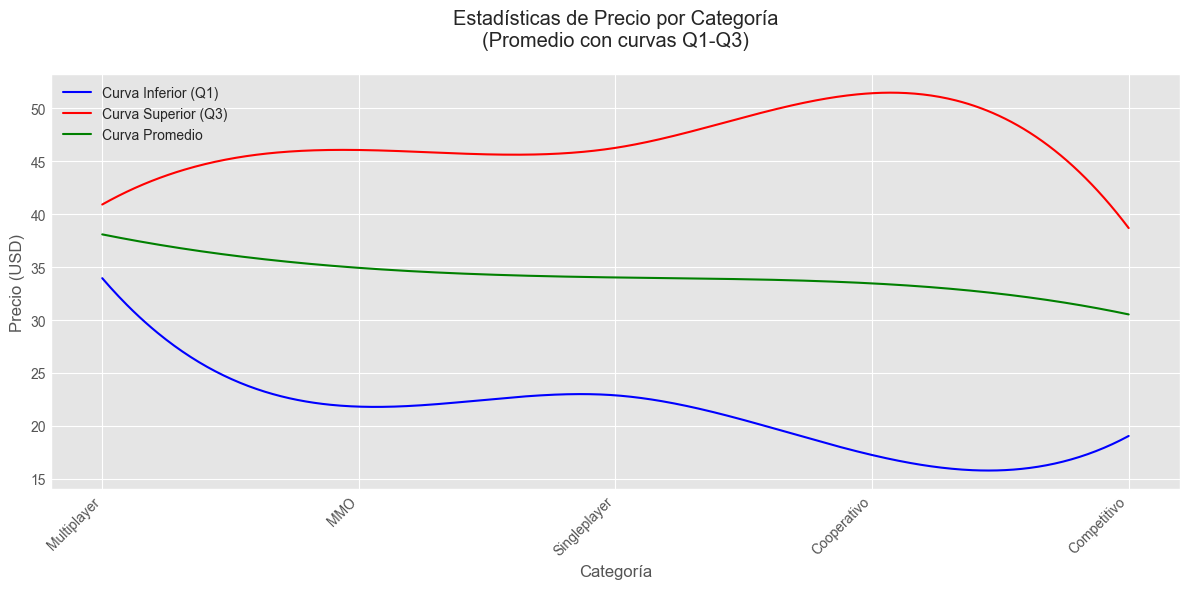

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.interpolate import make_interp_spline

# Configuración inicial
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

# Ejemplo de datos
data = {
    'ID': range(1, 101),
    'Precio': np.random.uniform(5, 60, 100),
    'Géneros': np.random.choice(['Acción', 'Aventura', 'RPG', 'Estrategia', 'Deportes', 'Simulación'], 100),
    'Categorías': np.random.choice(['Singleplayer', 'Multiplayer', 'Cooperativo', 'Competitivo', 'MMO'], 100)
}
df = pd.DataFrame(data)

# Función para graficar con curvas
def plot_price_stats_by_column(column, title):
    stats = df.groupby(column)['Precio'].agg(['mean', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)])
    stats.columns = ['Promedio', 'Q1', 'Q3']
    stats = stats.sort_values('Promedio', ascending=False)

    plt.figure(figsize=(12, 6))

    x_pos = np.arange(len(stats))

    # Curvas para Q1 y Q3
    for q, color, label in zip([stats['Q1'], stats['Q3']], ['blue', 'red'], ['Curva Inferior (Q1)', 'Curva Superior (Q3)']):
        spline = make_interp_spline(x_pos, q, k=3)  # k=3 para una curva suave
        x_new = np.linspace(min(x_pos), max(x_pos), 500)
        y_new = spline(x_new)
        plt.plot(x_new, y_new, color=color, linestyle='-', label=label)

    # Curva para el Promedio
    spline_prom = make_interp_spline(x_pos, stats['Promedio'], k=3)
    y_prom_new = spline_prom(np.linspace(min(x_pos), max(x_pos), 500))
    plt.plot(np.linspace(min(x_pos), max(x_pos), 500), y_prom_new, color='green', linestyle='-', label='Curva Promedio')

    # Estética
    plt.title(f'Estadísticas de Precio por {title}\n(Promedio con curvas Q1-Q3)', pad=20)
    plt.xlabel(title)
    plt.ylabel('Precio (USD)')
    plt.xticks(x_pos, stats.index, rotation=45, ha='right')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Ejecutar con Géneros y Categorías
plot_price_stats_by_column('Géneros', 'Género')
plot_price_stats_by_column('Categorías', 'Categoría')
